In [1]:
suppressPackageStartupMessages({
  library(GEOquery)
  library(stringr)
  library(dplyr)
  library(magrittr)
  library(tidyverse)
  library(survival)
    library(biomaRt)
    library(survminer)
    library(gridExtra)
})

In [2]:
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

In [3]:
geo_acc_tot<-c("GSE16476", "GSE49710")

In [4]:
gse <- readRDS('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_info.rds')
fset <- fData(gse)
eset <- exprs(gse)
pset<-pData(gse)

In [53]:
eset %>% dim

[1] 44708   498

In [6]:
fset %>% dim

[1] 44708    25

In [40]:
#fData(gse) %>% filter(ID == 'AFFX-HUMISGF3A/M97935_3_at')

In [7]:
fData(gse) %>% dplyr::select(c("ID", "GeneSymbol")) %>%
    mutate(`GeneSymbol` = sapply(strsplit(as.character(`GeneSymbol`), " /// "), `[`, 1)) %>%
    filter(!is.na(`GeneSymbol`)) %>% dim

[1] 31145     2

In [8]:
fdata_filtered = fData(gse) %>% dplyr::select(c("ID", "GeneSymbol")) %>%
    mutate(`GeneSymbol` = sapply(strsplit(as.character(`GeneSymbol`), " /// "), `[`, 1)) %>%
    filter(!is.na(`GeneSymbol`))

In [9]:
rownames(eset) %>% tail

[1] "45215" "45216" "45217" "45218" "45219" "45220"

In [10]:
fdata_filtered %>% rownames %>% tail

[1] "45203" "45204" "45205" "45207" "45208" "45209"

In [11]:
eset_filtered = eset[ fdata_filtered%>% rownames, ]

In [12]:
rownames(eset_filtered) = fdata_filtered$`GeneSymbol`

In [13]:
pset %>% dim

[1] 498  51

In [14]:
pset %>% head

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,age at diagnosis:ch1,class label:ch1,dataset:ch1,death from disease:ch1,high risk:ch1,inss stage:ch1,mycn status:ch1,progression:ch1,Sex:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1205238,SEQC NB patient 001,GSM1205238,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,987,1,1,1,1,4,0,1,M,Neuroblastoma
GSM1205239,SEQC NB patient 002,GSM1205239,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,1808,1,2,1,1,4,0,1,M,Neuroblastoma
GSM1205240,SEQC NB patient 003,GSM1205240,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,625,1,1,1,1,4,1,1,F,Neuroblastoma
GSM1205241,SEQC NB patient 004,GSM1205241,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,335,N/A,2,0,1,2,1,0,F,Neuroblastoma
GSM1205242,SEQC NB patient 005,GSM1205242,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,536,1,1,1,1,4,1,1,F,Neuroblastoma
GSM1205243,SEQC NB patient 006,GSM1205243,Public on Oct 21 2014,Aug 09 2013,Oct 21 2014,RNA,1,neuroblastoma,Homo sapiens,tissue: Neuroblastoma,⋯,147,0,2,0,0,4S,0,0,M,Neuroblastoma


In [22]:
vals1 = c('title','death from disease:ch1', 'high risk:ch1', 'inss stage:ch1', 'progression:ch1','Sex:ch1','tissue:ch1','age at diagnosis:ch1')

In [23]:
idx = match(vals1, colnames(pset))

In [51]:
metadata = data.frame(pset[,idx],
                row.names = rownames(pset))

In [52]:
metadata = data.frame(pset[,idx],
                row.names = rownames(pset))
colnames(metadata) = c(
    'title','death', 'risk', 'stage', 'progression', 
    'gender', 'tissue', 'age'
)

In [53]:
metadata <- metadata[!apply(metadata, 1, function(x) any( is.na(x) )),]

In [54]:
scaled_z <- t(scale(t(eset_filtered[,colnames(eset_filtered)%in%rownames(metadata)])))

In [55]:
scaled_z <- t(scale(t(eset_filtered[,colnames(eset_filtered)%in%rownames(metadata)])))
GSE49710_dat = list(dat = scaled_z, metadata = metadata)
saveRDS(GSE49710_dat, '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_survival_processed.rds')

In [108]:
saveRDS(GSE49710_dat, '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_survival_processed.rds')

In [15]:
gse2 <- readRDS('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE62564_info.rds')

In [16]:
pdata2 = pData(gse2)
fset2 = fData(gse2)

In [17]:
eset2 <- exprs(gse2)

In [18]:
vals2 = c('title', "os day:ch1" ,"os bin:ch1", "efs day:ch1", "efs bin:ch1", "age:ch1", "Sex:ch1")

In [24]:
metadata = data.frame(pset[,idx],
                row.names = rownames(pset))
colnames(metadata) = c(
    'title','death', 'risk', 'stage', 'progression', 
    'gender', 'tissue', 'age'
)

In [25]:
metadata$title =  gsub("SEQC NB patient ", "SEQC_NB", metadata$title)
metadata$title <- gsub(" ", "_", metadata$title)

In [26]:
metadata2 = pdata2 %>% dplyr::select(vals2)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(vals2)

  # Now:
  data %>% select(all_of(vals2))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


In [62]:
metadata %>% head

,title,death,risk,stage,progression,gender,tissue,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1205238,SEQC_NB001,1,1,4,1,M,Neuroblastoma,987
GSM1205239,SEQC_NB002,1,1,4,1,M,Neuroblastoma,1808
GSM1205240,SEQC_NB003,1,1,4,1,F,Neuroblastoma,625
GSM1205241,SEQC_NB004,0,1,2,0,F,Neuroblastoma,335
GSM1205242,SEQC_NB005,1,1,4,1,F,Neuroblastoma,536
GSM1205243,SEQC_NB006,0,0,4S,0,M,Neuroblastoma,147


In [27]:
metadata2$title <- gsub(" \\[.*\\]", "", metadata2$title)

In [28]:
metadata2 %>% head

,title,os day:ch1,os bin:ch1,efs day:ch1,efs bin:ch1,age:ch1,Sex:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1528894,SEQC_NB001,1362,1,593,1,987,M
GSM1528895,SEQC_NB002,2836,1,2016,1,1808,M
GSM1528896,SEQC_NB003,1191,1,840,1,625,F
GSM1528897,SEQC_NB004,2046,0,2046,0,335,F
GSM1528898,SEQC_NB005,220,1,212,1,536,F
GSM1528899,SEQC_NB006,2217,0,2217,0,147,M


In [65]:
colnames(metadata2) = c('title', 'OS.days', 'OS.event', 'EFS.days', 'EFS.event', 'age2', 'gender2')

In [66]:
metadata2 = merge(metadata, metadata2, by ="title")

In [67]:
colnames(eset_filtered) = metadata[(colnames(eset_filtered)),'title']

In [69]:
scaled_z <- t(scale(t(eset_filtered[,colnames(eset_filtered)%in%rownames(metadata2)])))
GSE49710_dat = list(dat = scaled_z, metadata = metadata2)
saveRDS(GSE49710_dat,
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_survival_processed.rds')

In [29]:
GSE49710_dat = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_survival_processed.rds'
)

In [30]:
scaled_z = GSE49710_dat$dat
metadata2 = GSE49710_dat$metadata

In [31]:
metadata2 %>% ifelse()

,title,death,risk,stage,progression,gender,tissue,age,OS.days,OS.event,EFS.days,EFS.event,age2,gender2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SEQC_NB001,1,1,4,1,M,Neuroblastoma,987,1362,1,593,1,987,M
2,SEQC_NB002,1,1,4,1,M,Neuroblastoma,1808,2836,1,2016,1,1808,M
3,SEQC_NB003,1,1,4,1,F,Neuroblastoma,625,1191,1,840,1,625,F
4,SEQC_NB004,0,1,2,0,F,Neuroblastoma,335,2046,0,2046,0,335,F
5,SEQC_NB005,1,1,4,1,F,Neuroblastoma,536,220,1,212,1,536,F
6,SEQC_NB006,0,0,4S,0,M,Neuroblastoma,147,2217,0,2217,0,147,M


In [121]:
ano = metadata2

In [122]:
ano$time=round(as.numeric(ano$OS.days)/30,0)
ano$vital_status=as.numeric(ano$OS.event)
ano$inss=ano$stage
#index=ano$inss!='4S'
#ano=ano[index,]
exp=eset_filtered

In [123]:
ano$risk=as.numeric(ano$risk)

In [124]:
exp %>% dim

[1] 31145   498

In [125]:
ano %>% dim

[1] 498  17

In [126]:
dat=readRDS('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/GSE49711.dat.rds')

In [127]:
dat %>% dim

[1] 23353   445

In [128]:
getwd()

[1] "/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/notebook/With_Ribosom/Cancer_Research_Revision_Notebooks"

In [129]:
ano$inss=as.numeric(factor(ano$stage, levels = c("1", "2", "3", "4", "4S"), labels = c(1, 2, 3, 4, 5)))

In [130]:
survival_data = read.csv('survival_data.csv')

In [131]:
survival_data  %>% colnames

[1] "X"                   "Sample.ID"           "Sample_title"       
 [4] "EFS.day"             "EFS.bin"             "OS.day"             
 [7] "OS.bin"              "High.Risk"           "Gender"             
[10] "training.validation" "mycn_status"         "high_risk"          
[13] "time"

In [132]:
survival_data[,c("Sample.ID", "mycn_status")]%>% head

,Sample.ID,mycn_status
,<chr>,<chr>
1,SEQC_NB001,0
2,SEQC_NB002,0
3,SEQC_NB003,1
4,SEQC_NB004,1
5,SEQC_NB005,1
6,SEQC_NB006,0


In [133]:
ano %>% head

,title,death,risk,stage,progression,gender,tissue,age,OS.days,OS.event,EFS.days,EFS.event,age2,gender2,time,vital_status,inss
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,SEQC_NB001,1,1,4,1,M,Neuroblastoma,987,1362,1,593,1,987,M,45,1,4
2,SEQC_NB002,1,1,4,1,M,Neuroblastoma,1808,2836,1,2016,1,1808,M,95,1,4
3,SEQC_NB003,1,1,4,1,F,Neuroblastoma,625,1191,1,840,1,625,F,40,1,4
4,SEQC_NB004,0,1,2,0,F,Neuroblastoma,335,2046,0,2046,0,335,F,68,0,2
5,SEQC_NB005,1,1,4,1,F,Neuroblastoma,536,220,1,212,1,536,F,7,1,4
6,SEQC_NB006,0,0,4S,0,M,Neuroblastoma,147,2217,0,2217,0,147,M,74,0,5


In [134]:
ano = merge(ano, survival_data[,c("Sample.ID", "mycn_status")], by.x = "title", by.y = "Sample.ID")

In [135]:
ano$mycn_status = as.numeric(ano$mycn_status)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [136]:
ano %>% head

,title,death,risk,stage,progression,gender,tissue,age,OS.days,OS.event,EFS.days,EFS.event,age2,gender2,time,vital_status,inss,mycn_status
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SEQC_NB001,1,1,4,1,M,Neuroblastoma,987,1362,1,593,1,987,M,45,1,4,0
2,SEQC_NB002,1,1,4,1,M,Neuroblastoma,1808,2836,1,2016,1,1808,M,95,1,4,0
3,SEQC_NB003,1,1,4,1,F,Neuroblastoma,625,1191,1,840,1,625,F,40,1,4,1
4,SEQC_NB004,0,1,2,0,F,Neuroblastoma,335,2046,0,2046,0,335,F,68,0,2,1
5,SEQC_NB005,1,1,4,1,F,Neuroblastoma,536,220,1,212,1,536,F,7,1,4,1
6,SEQC_NB006,0,0,4S,0,M,Neuroblastoma,147,2217,0,2217,0,147,M,74,0,5,0


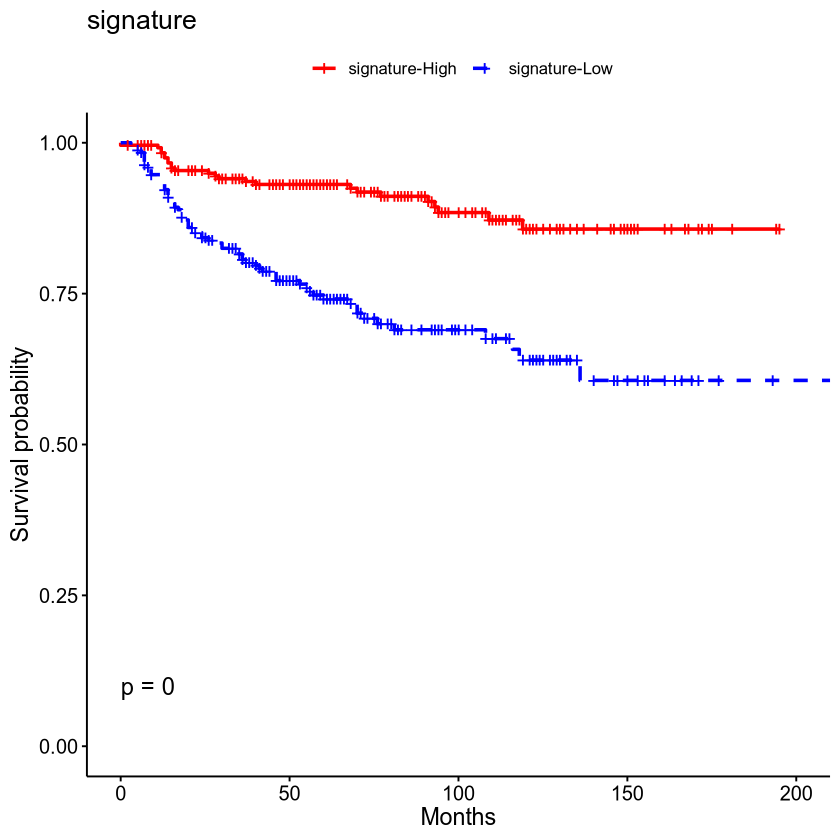

In [138]:
gs=c('DDIT4', 'BAIAP2', 'CDKN1A')
magnitude.norm=TRUE
title='signature'

gene_rpkm=exp
tmp=gene_rpkm[gs,]
if (!is.null(magnitude.norm)){
tmp=apply(tmp,2,function(x) x/max(x))
}

score=scale(rowMeans(t(tmp)))  # avearge expression 
res=data.frame(colnames(gene_rpkm),'exp'=score,'score'=score,ano)





cut1=quantile(res$exp,0.5)
cut2=quantile(res$exp,0.5)

res1=res[res$exp>=cut1,]

res2=res[res$exp<cut2,]



fn1=paste(title,'-High',sep='')
fn2=paste(title,'-Low',sep='')

res2$x=fn2
res1$x=fn1 #'High-exp'
res=rbind(res1,res2)
fit <- survival::survfit(Surv(time, mycn_status) ~ x, data = res)

pvalue=survdiff(Surv(time, mycn_status)~x, data=res)
p2=round(1-pchisq(pvalue$chisq,1),4)

#if (p2==0){
#  p2=0.0001
#}

# title=gs
p0=NULL
p0=ggsurvplot(fit, pval = p2,linetype = c("solid", "dashed"), #
            palette = c("red","blue"),title=title, #paste(gs,p2),
            legend.title="",legend.labs=c(fn1,fn2),xlab='Months', pval.coord = c(0, 0.1),
            conf.int = F) 
p0

In [56]:
library("rentrez")


In [57]:
search_result <- entrez_search(db = "nucleotide", term = "NM_000029")

# Get detailed information about the sequence
summary_result <- entrez_summary(db = "nucleotide", id = search_result$ids[1])

# Print the result


esummary result with 28 items:
 [1] uid              term             caption          accessionversion
 [5] sourcedb         title            extra            gi              
 [9] createdate       updatedate       genome           organism        
[13] taxid            geneticcode      subtype          subname         
[17] slen             moltype          topology         completeness    
[21] biomol           biosample        statistics       comment         
[25] status           flags            properties       oslt

In [58]:
summary_result$title

[1] "Homo sapiens angiotensinogen (AGT), transcript variant 1, mRNA"

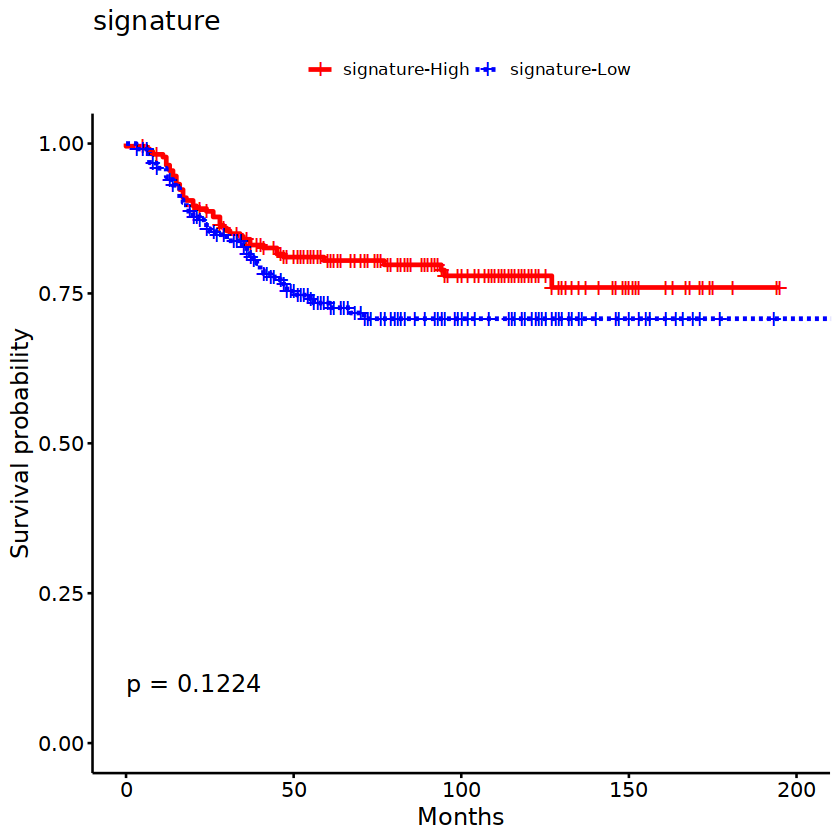

In [200]:
gs=c('DDIT4', 'BAIAP2', 'CDKN1A')
magnitude.norm=TRUE
title='signature'

gene_rpkm=exp
tmp=gene_rpkm[gs,]
if (!is.null(magnitude.norm)){
tmp=apply(tmp,2,function(x) x/max(x))
}

score=scale(rowMeans(t(tmp)))  # avearge expression 
res=data.frame(colnames(gene_rpkm),'exp'=score,'score'=score,ano)





cut1=quantile(res$exp,0.5)
cut2=quantile(res$exp,0.5)

res1=res[res$exp>=cut1,]

res2=res[res$exp<cut2,]



fn1=paste(title,'-High',sep='')
fn2=paste(title,'-Low',sep='')

res2$x=fn2
res1$x=fn1 #'High-exp'
res=rbind(res1,res2)
fit <- survival::survfit(Surv(time, vital_status) ~ x, data = res)

pvalue=survdiff(Surv(time, vital_status)~x, data=res)
p2=round(1-pchisq(pvalue$chisq,1),4)

#if (p2==0){
#  p2=0.0001
#}

# title=gs
p0=NULL
p0=ggsurvplot(fit, pval = p2,linetype = c("solid", "dashed"), #
            palette = c("red","blue"),title=title, #paste(gs,p2),
            legend.title="",legend.labs=c(fn1,fn2),xlab='Months', pval.coord = c(0, 0.1),
            conf.int = F) 
p0

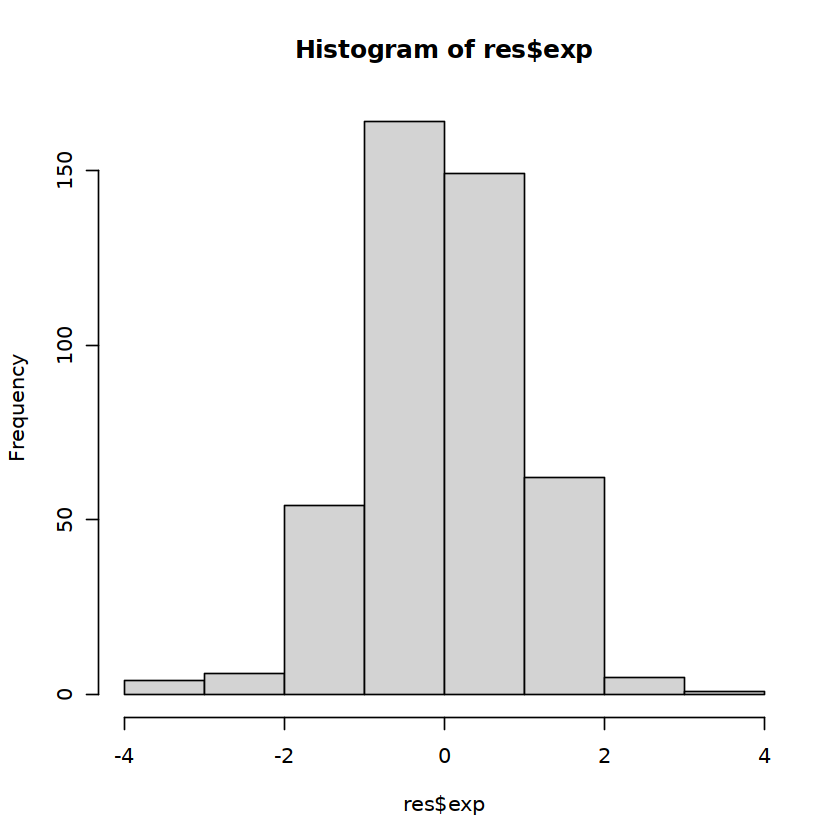

In [199]:
hist(res$exp)

In [7]:
count_mat = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/GSE49711.dat.rds'
)

In [8]:
annot = read.csv(
    '../spread_sheet/GSE49711_metadata.txt',
    sep = '\t'
)

In [16]:
t(annot) %>% head

X.H.hugo,#age_at_diagnosis,#d_fav_all,#death_from_disease,#efs_bin,#efs_day,#geo_id_rnaseq,#high_risk,#id,#inss_stage,#mycn_status,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
probeset,age_at_diagnosis,d_fav_all,death_from_disease,efs_bin,efs_day,geo_id_rnaseq,high_risk,id,inss_stage,mycn_status,⋯,NM_017975,NM_032997,NM_007156,NM_007157,NM_001040653,NM_001004339,NM_024646,NM_001010972,NM_015113,NM_015534
gsm1205238,987,unfavorable,yes,event,593,gsm1528894,yes,0,st4,mycn_nonamp,⋯,33.245,46.633,10.863,24.344,59.688,4.482,86.509,65.714,96.339,38.375
gsm1205239,1808,unfavorable,yes,event,2016,gsm1528895,yes,1,st4,mycn_nonamp,⋯,30.283,44.562,9.791,32.581,52.589,1.220,88.003,71.035,70.986,31.190
gsm1205240,625,unfavorable,yes,event,840,gsm1528896,yes,2,st4,mycn_amp,⋯,30.466,36.679,10.095,26.020,63.857,1.080,30.141,62.734,72.160,19.088
gsm1205241,335,nd,no,no_event,2046,gsm1528897,yes,3,st2,mycn_amp,⋯,32.934,24.167,8.701,25.847,52.127,1.361,71.767,142.534,71.473,33.379


In [75]:
GSE49710_dat = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49710_survival_processed.rds')

In [83]:
exp=readRDS('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/GSE49711.dat.rds')

In [84]:
exp %>% dim

[1] 23353   445

In [85]:
exp %>% colnames %>% head

[1] "SEQC_NB001" "SEQC_NB002" "SEQC_NB003" "SEQC_NB004" "SEQC_NB005"
[6] "SEQC_NB007"

In [86]:
meta_data_from_data_graber = read.csv(
    '../spread_sheet/GSE49711_datagrabber_metadata.txt'
)

In [87]:
meta_data = GSE49710_dat$metadata

In [88]:
rownames(meta_data) = meta_data$title

In [90]:
ano = meta_data[colnames(exp),] 

In [91]:
ano %>% head

,title,death,risk,stage,progression,gender,tissue,age,OS.days,OS.event,EFS.days,EFS.event,age2,gender2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SEQC_NB001,SEQC_NB001,1,1,4,1,M,Neuroblastoma,987,1362,1,593,1,987,M
SEQC_NB002,SEQC_NB002,1,1,4,1,M,Neuroblastoma,1808,2836,1,2016,1,1808,M
SEQC_NB003,SEQC_NB003,1,1,4,1,F,Neuroblastoma,625,1191,1,840,1,625,F
SEQC_NB004,SEQC_NB004,0,1,2,0,F,Neuroblastoma,335,2046,0,2046,0,335,F
SEQC_NB005,SEQC_NB005,1,1,4,1,F,Neuroblastoma,536,220,1,212,1,536,F
SEQC_NB007,SEQC_NB007,0,1,4,1,M,Neuroblastoma,942,3152,0,562,1,942,M


In [96]:
gse49711 = list(
    dat = exp,
    metadata = ano
)

In [97]:
saveRDS(
    gse49711,
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49711_survival_processed.rds'
)

In [1]:
gse49711 = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/survival/GSE49711_survival_processed.rds'
)

In [5]:
gse49711$dat %>% dim

[1] 23353   445

In [3]:
ano = gse49711$metadata
exp = gse49711$dat

In [4]:
ano$OS=round(as.numeric(ano$OS.days)/30,0)
ano$time=as.numeric(ano$OS)
ano$vital_status=as.numeric(ano$OS.event)
ano$inss=ano$stage

index=ano$inss!='4S'
ano=ano[index,]
dat=exp[,index]

In [5]:
dat %>% dim

[1] 23353   445

In [6]:
ano %>% dim

[1] 445  18

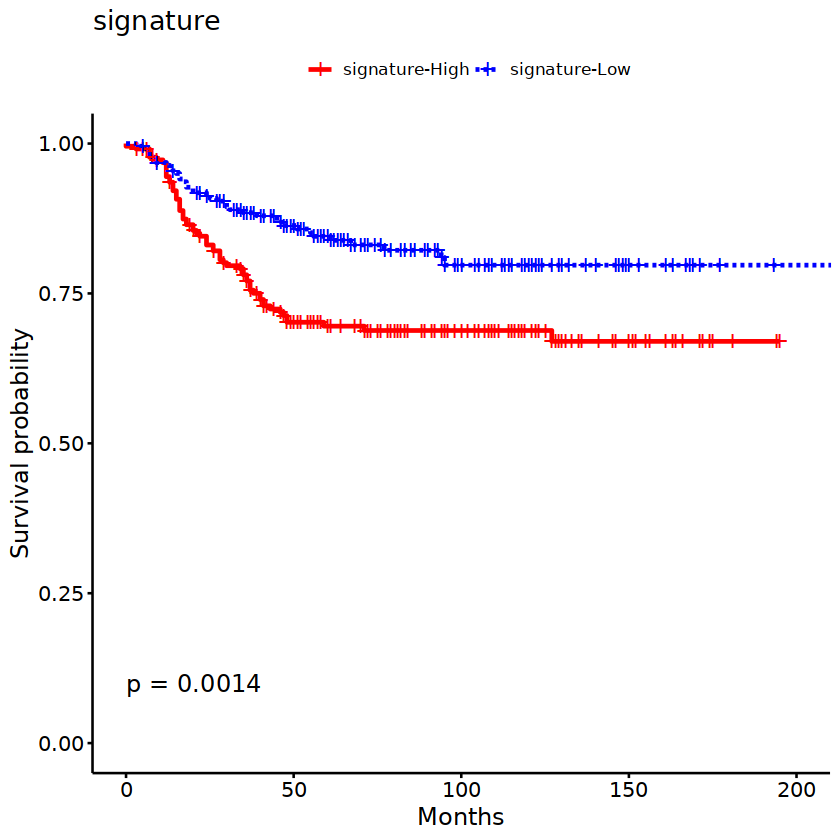

In [7]:
gs=c('SOX10','ERBB3')
magnitude.norm=TRUE
title='signature'

gene_rpkm=exp
tmp=gene_rpkm[gs,]
  if (!is.null(magnitude.norm)){
    tmp=apply(tmp,2,function(x) x/max(x))
  }
  
  score=scale(rowMeans(t(tmp)))  # avearge expression 
  res=data.frame(colnames(gene_rpkm),'exp'=score,'score'=score,ano)

 

  
   
  cut1=quantile(res$exp,0.5)
  cut2=quantile(res$exp,0.5)
  
  res1=res[res$exp>=cut1,]
  
  res2=res[res$exp<cut2,]
  
  
  
  fn1=paste(title,'-High',sep='')
  fn2=paste(title,'-Low',sep='')
  
  res2$x=fn2
  res1$x=fn1 #'High-exp'
  res=rbind(res1,res2)
  fit <- survival::survfit(Surv(time, vital_status) ~ x, data = res)
  
  pvalue=survdiff(Surv(time, vital_status)~x, data=res)
  p2=round(1-pchisq(pvalue$chisq,1),4)
  
  #if (p2==0){
  #  p2=0.0001
  #}
  
 # title=gs
  p0=NULL
  p0=ggsurvplot(fit, pval = p2,linetype = c("solid", "dashed"), #
                palette = c("red","blue"),title=title, #paste(gs,p2),
                legend.title="",legend.labs=c(fn1,fn2),xlab='Months', pval.coord = c(0, 0.1),
                conf.int = F) 
p0
  
  
  
  

In [44]:
runSuv2<-function(
    gs,
    gene_rpkm,
    ano,
    magnitude.norm=NULL,
    title='SCP-like',
    xlab='Months',
    upper.c = 0.75,lower.c = 0.25){
  #tcancer='LUSC'
 # print(gs)
  print(gs)
  if(length(gs)<2){
    score=gene_rpkm[gs,]
  }else{
     tmp=gene_rpkm[gs,]
      if (!is.null(magnitude.norm)){
        tmp=apply(tmp,2,function(x) x/max(x))
      }
      score=scale(rowMeans(t(tmp)))  # avearge expression  
  }
  
  res=NULL
  res=data.frame(colnames(gene_rpkm),
                 'exp'=score,'score'=score,ano)

  
  cut1=quantile(res$exp,upper.c)
  cut2=quantile(res$exp,lower.c)
  
  res1=res[res$exp>=cut1,]
  res2=res[res$exp<cut2,]
  fn1=paste(title,'-High',sep='')
  fn2=paste(title,'-Low',sep='')
  
  res2$x=fn2
  res1$x=fn1 #'High-exp'
  res=rbind(res1,res2)
  print(dim(res))
  fit=NULL
  fit <- surv_fit(
      survival::Surv(
          time, risk
      ) ~ x, data = res)
  
  pvalue=survival::survdiff(
      survival::Surv(time,risk)~x, data=res)
  p2=NULL
  p2=round(1-pchisq(pvalue$chisq,1),6)
  
  p0=ggsurvplot(fit, pval = p2,linetype = c("solid", "dashed"), #
                palette = c("red","blue"),title=title, #paste(gs,p2),
                legend.title="",legend.labs=c(fn1,fn2),xlab=xlab, pval.coord = c(0, 0.1),
                conf.int = F) 
  return(list('fit2'=surv_summary(fit),'p2'=p2,'p0'=p0,'res'=res))
  
}

In [45]:
signature.df = openxlsx::read.xlsx(
    '../spread_sheet/Figure5_20240214_No_6-50_Organoids_survival_signatures.xlsx'
)

In [46]:
sig_groups = signature.df %>% 
    group_by(Annotation) %>%
    summarize(ValueList = list(Human.Gene), .groups = 'drop')

In [47]:
sig_groups_list = sig_groups$ValueList

In [48]:
names(sig_groups_list) = sig_groups$Annotation

In [49]:
sig_groups_list$`Neurite outgrowth`

[1] "FDPS" "SOD1" "PGK1" "TBCA"

In [50]:
exp2 <- preprocessCore::normalize.quantiles(exp)    #quantiles normlization
colnames(exp2)=colnames(exp)
rownames(exp2)=rownames(exp)

In [51]:
sig_groups_list %>% names

[1] "Neurite outgrowth"        "Neuronal Differentiation"
[3] "S phase Sympathoblasts"   "Synaptic signaling"

In [52]:
plot_list = lapply(names(sig_groups_list), function(celltype){
    df = runSuv2(sig_groups_list[[celltype]],
                   exp,
                   ano,
                   magnitude.norm = TRUE,
                   title = paste(celltype, '-','survival'))
    pval = df$p2
    
    fig.size(10,10)
    p = ggplot(df$fit2, aes(x = time, y = surv, color = x)) + theme_classic() +
        ylab('Survival Probability') + xlab('Months') + #ggtitle(tcancer)+
        geom_line() + guides(color = guide_legend("group")) +  theme(plot.title = element_text(hjust = 0.5)) +
    annotate(
        "text",
        x = quantile(df$fit2$time, 0.3),
        y = 0.25,
        label = paste('p=', round(pval, 3), sep = ''
    ))
    p 
})

[1] "FDPS" "SOD1" "PGK1" "TBCA"


ERROR: Error in gene_rpkm[gs, ]: subscript out of bounds


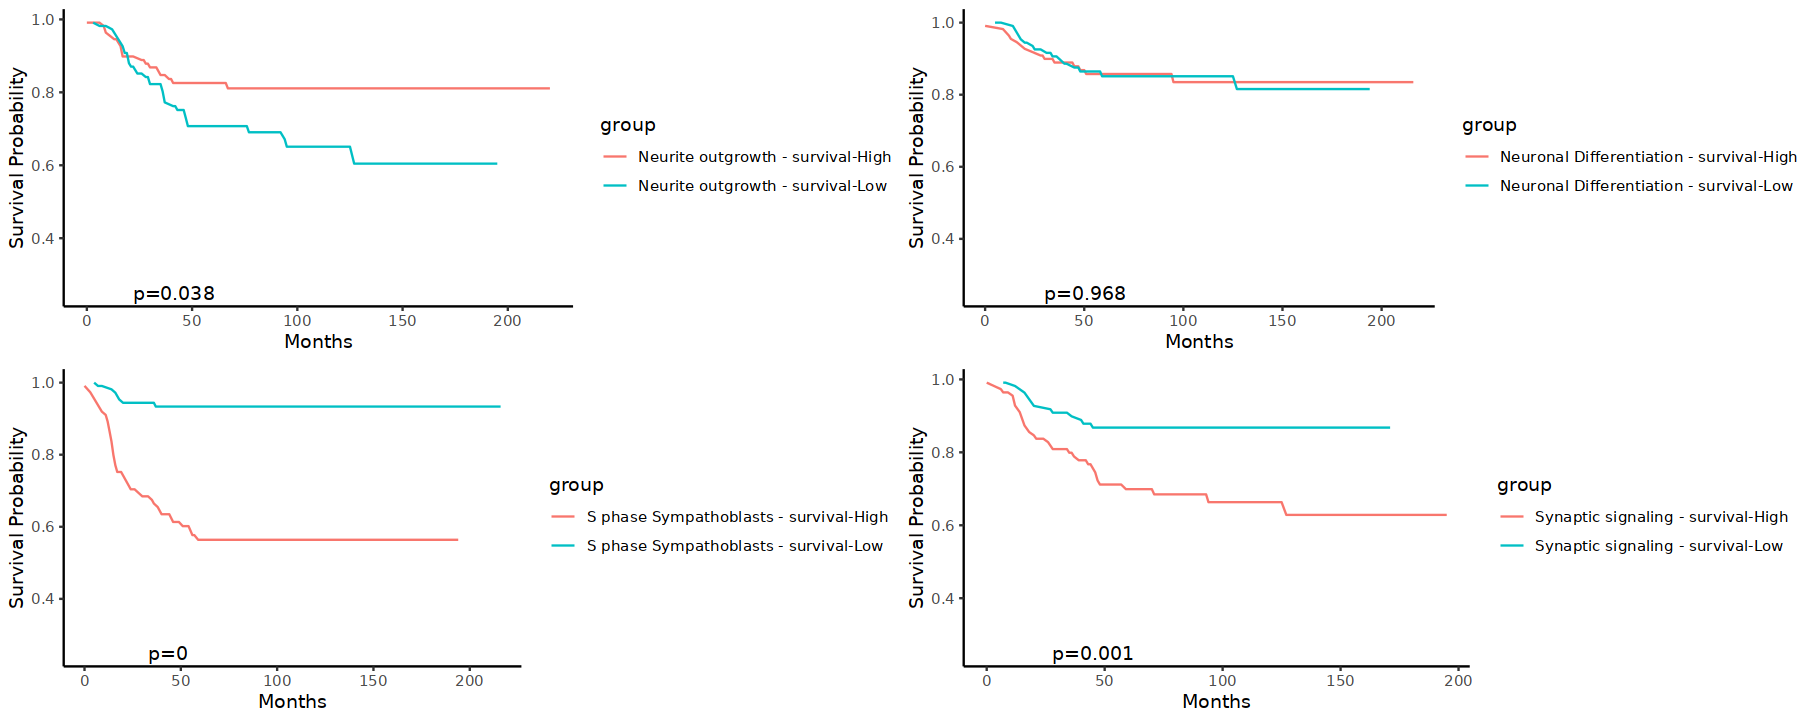

In [39]:
fig.size(6,15)
do.call("grid.arrange", c(plot_list, ncol = 2)) 

In [70]:
plot_list = lapply(names(sig_groups_list), function(celltype){
    df = runSuv2(sig_groups_list[[celltype]],
                   exp2,
                   ano,
                   magnitude.norm = TRUE,
                   title = paste(celltype, '-','survival'))
    pval = df$p2
    
    fig.size(10,10)
    p = ggplot(df$fit2, aes(x = time, y = surv, color = x)) + theme_classic() +
        ylab('Survival Probability') + xlab('Months') + #ggtitle(tcancer)+
        geom_line() + guides(color = guide_legend("group")) +  theme(plot.title = element_text(hjust = 0.5)) +
    annotate(
        "text",
        x = quantile(df$fit2$time, 0.3),
        y = 0.25,
        label = paste('p=', round(pval, 3), sep = ''
    ))
    p 
})

[1] "FDPS" "SOD1" "PGK1" "TBCA"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "CRABP1" "ASS1"   "NOS1"   "HMX3"  
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "BAIAP2" "FBXO5"  "CCNE1"  "DDIT4"  "CDKN1A"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "TSIX"  "KTN1"  "NSD1"  "DHX36"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


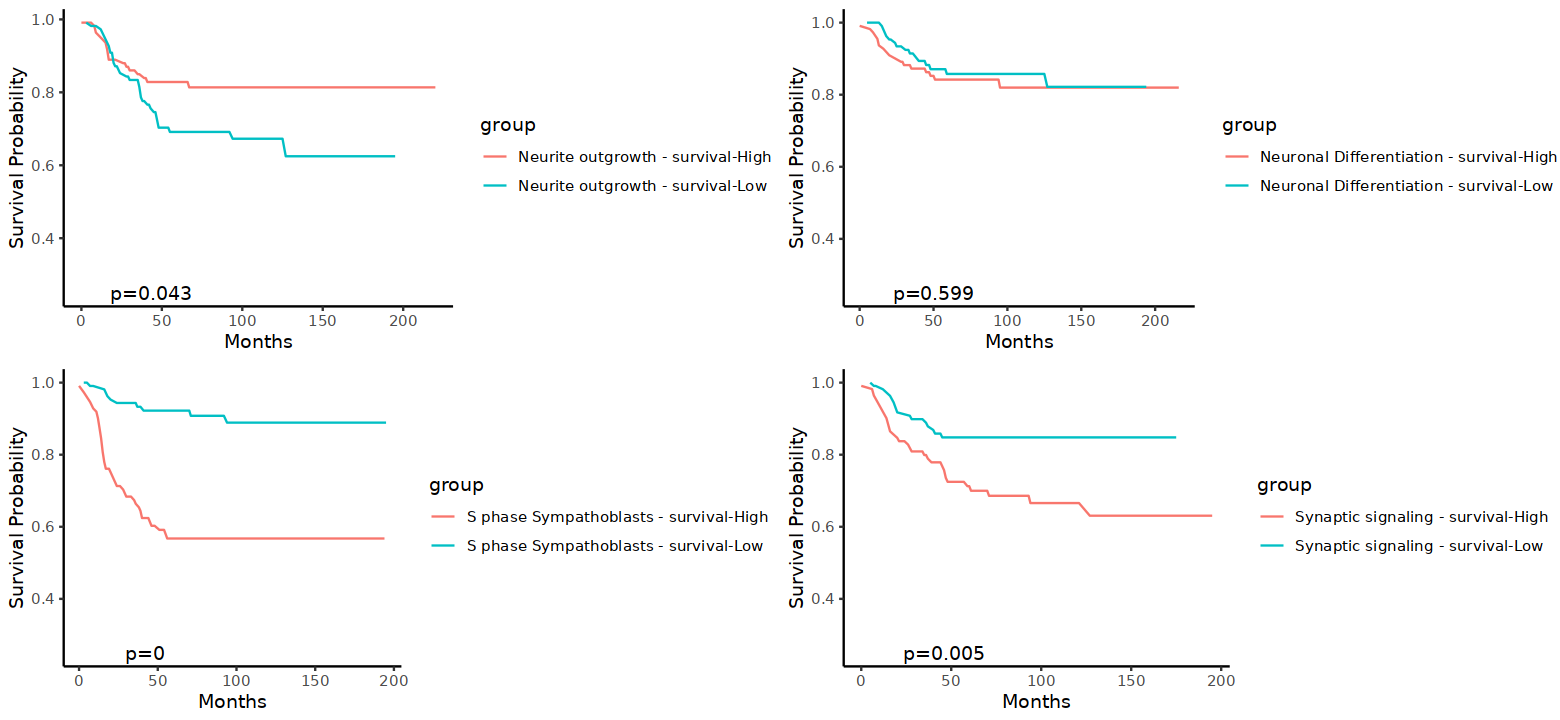

In [71]:
fig.size(6,13)
do.call("grid.arrange", c(plot_list, ncol = 2)) 

In [73]:
plots <- do.call(gridExtra::arrangeGrob, c(plot_list, ncol = 2))
ggsave(
    plot = plots,
    filename = glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
        'results/figures/2022/Figure_5/survival_plot_signature_genes.pdf'
    ),
    width = 13,
    height = 6,
    dpi=300
)

In [46]:
plot_list = lapply(signature.df$Human.Gene, function(gene){
    df = runSuv2(gene,
                   exp2,
                   ano,
                   magnitude.norm = TRUE,
                   title = paste(gene, '-','survival'))
    pval = df$p2
    
    fig.size(10,10)
    p = ggplot(df$fit2, aes(x = time, y = surv, color = x)) + theme_classic() +
        ylab('Survival Probability') + xlab('Months') + #ggtitle(tcancer)+
        geom_line() + guides(color = guide_legend("group")) +  theme(plot.title = element_text(hjust = 0.5)) +
    annotate(
        "text",
        x = quantile(df$fit2$time, 0.3),
        y = 0.25,
        label = paste('p=', round(pval, 3), sep = ''
    ))
    p 
})

[1] "TSIX"
[1] 224  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "KTN1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "NSD1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "DHX36"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "FDPS"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "SOD1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "PGK1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "TBCA"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "BAIAP2"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "FBXO5"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "CCNE1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "DDIT4"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "CDKN1A"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "CRABP1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "ASS1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "NOS1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


[1] "HMX3"
[1] 113  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


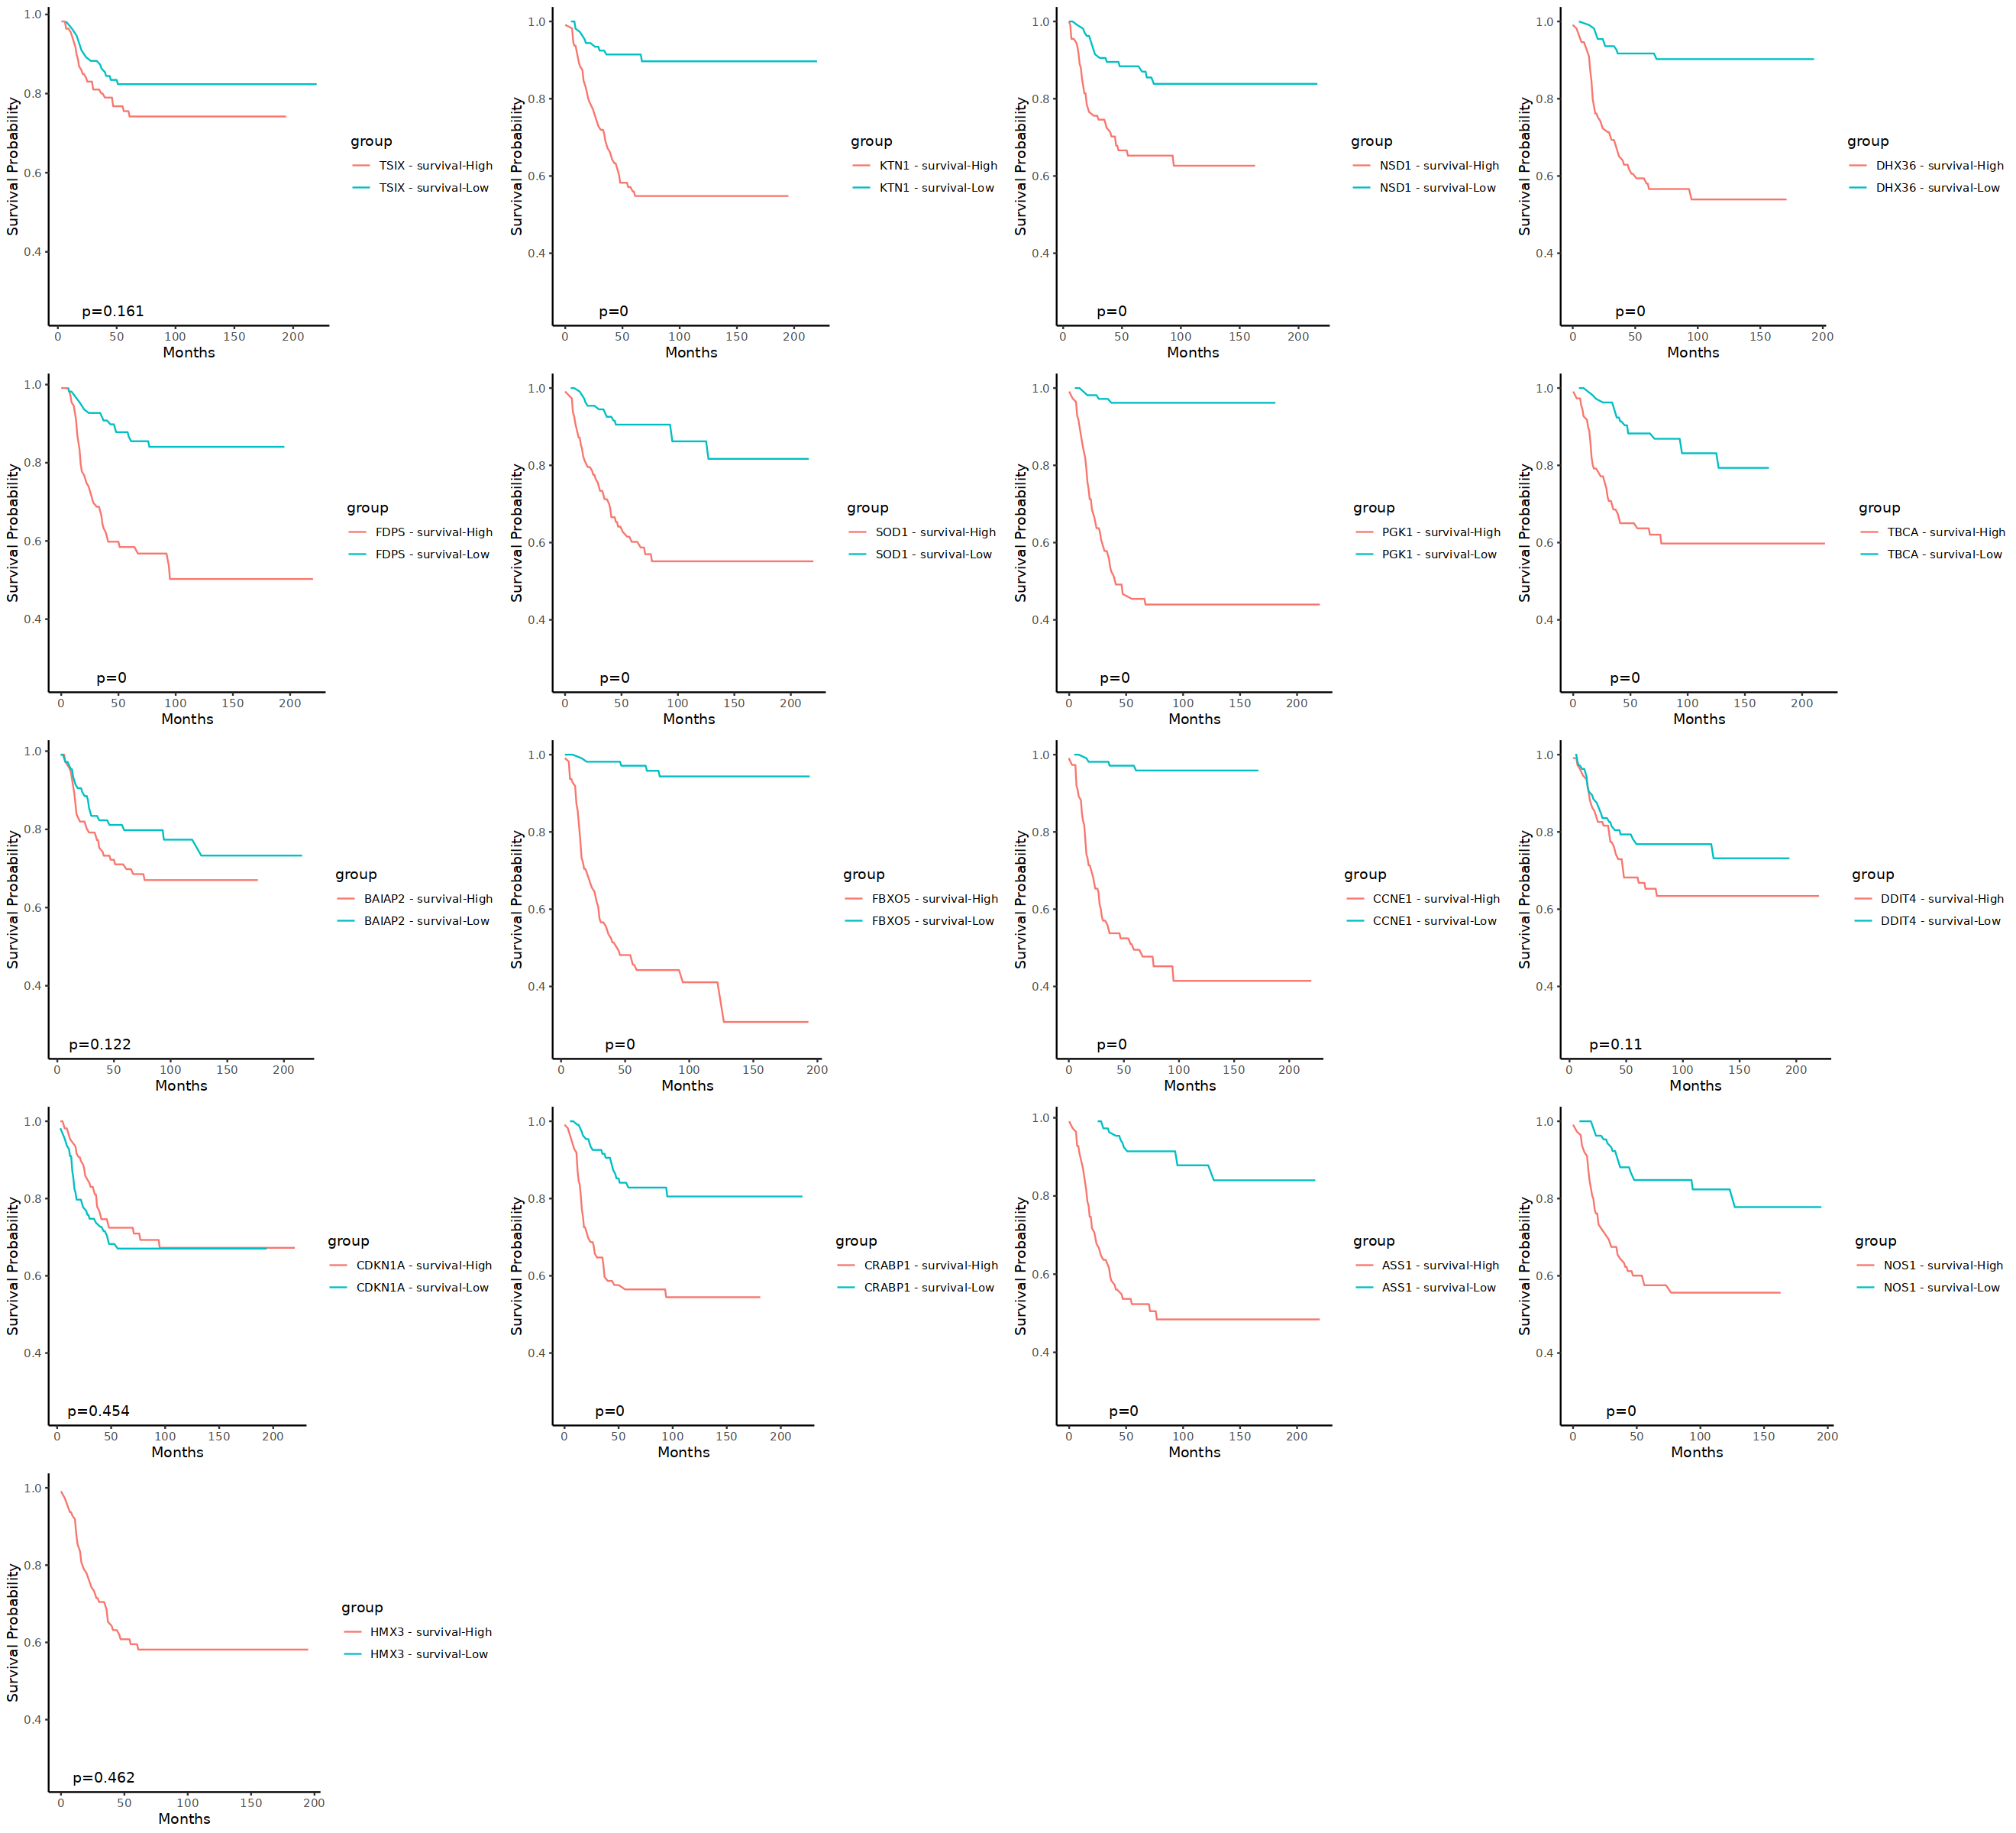

In [47]:
fig.size(20,22)
do.call("grid.arrange", c(plot_list, ncol = 4)) 

In [69]:
plots <- do.call(gridExtra::arrangeGrob, c(plot_list, ncol = 4))
ggsave(
    plot = plots,
    filename = glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
        'results/figures/2022/Figure_5/survival_plot_individual_genes.pdf'
    ),
    width = 22,
    height = 20,
    dpi=300
)

In [48]:
signature.df

,Cluster_Number,Annotation,Mouse.Gene,Human.Gene
,<dbl>,<chr>,<chr>,<chr>
1,3,Synaptic signaling,Tsix,TSIX
2,3,Synaptic signaling,Ktn1,KTN1
3,3,Synaptic signaling,Nsd1,NSD1
4,3,Synaptic signaling,Dhx36,DHX36
5,6,Neurite outgrowth,Fdps,FDPS
6,6,Neurite outgrowth,Sod1,SOD1
7,6,Neurite outgrowth,Pgk1,PGK1
8,6,Neurite outgrowth,Tbca,TBCA
9,8,S phase Sympathoblasts,Baiap2,BAIAP2


[1] "HMX3"
[1] 113  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


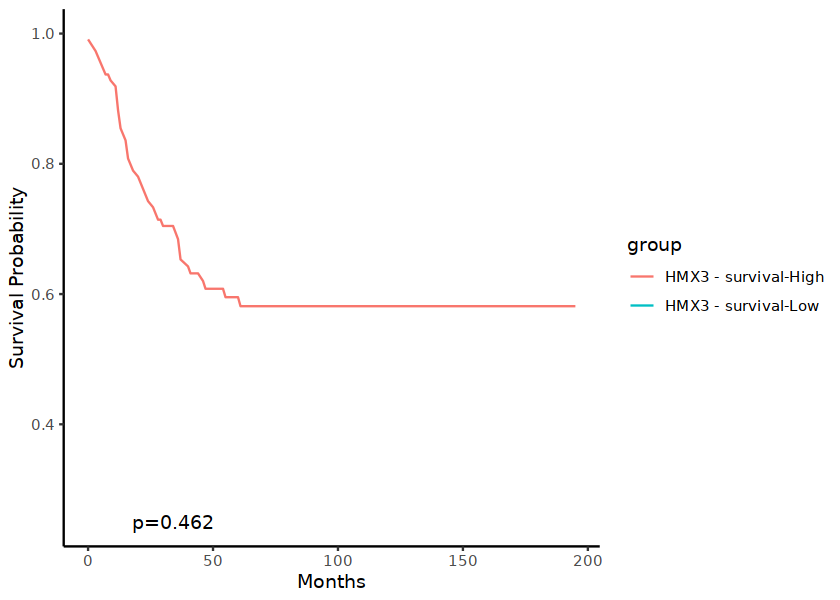

In [64]:
fig.size(5,7)
df1 = runSuv2(c("HMX3"),
                   exp2,
                   ano,
                   magnitude.norm = TRUE,
                   title = paste("HMX3", '-','survival'))
    pval = df$p2
    
    
    p = ggplot(df1$fit2, aes(x = time, y = surv, color = x)) + theme_classic() +
        ylab('Survival Probability') + xlab('Months') + #ggtitle(tcancer)+
        geom_line() + guides(color = guide_legend("group")) +  theme(plot.title = element_text(hjust = 0.5)) +
    annotate(
        "text",
        x = quantile(df$fit2$time, 0.3),
        y = 0.25,
        label = paste('p=', round(pval, 3), sep = ''
    ))
    p 

[1] "NOS1"
[1] 223  22


Warning message in .get_data(x, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


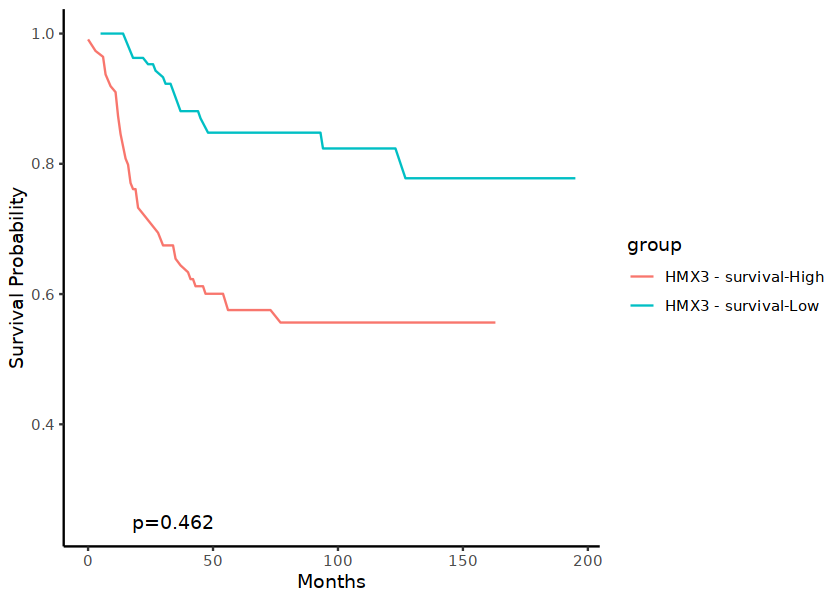

In [63]:
fig.size(5,7)
df2 = runSuv2(c("NOS1"),
                   exp2,
                   ano,
                   magnitude.norm = TRUE,
                   title = paste("HMX3", '-','survival'))
    pval = df$p2
    
    
    p = ggplot(df2$fit2, aes(x = time, y = surv, color = x)) + theme_classic() +
        ylab('Survival Probability') + xlab('Months') + #ggtitle(tcancer)+
        geom_line() + guides(color = guide_legend("group")) +  theme(plot.title = element_text(hjust = 0.5)) +
    annotate(
        "text",
        x = quantile(df$fit2$time, 0.3),
        y = 0.25,
        label = paste('p=', round(pval, 3), sep = ''
    ))
    p 

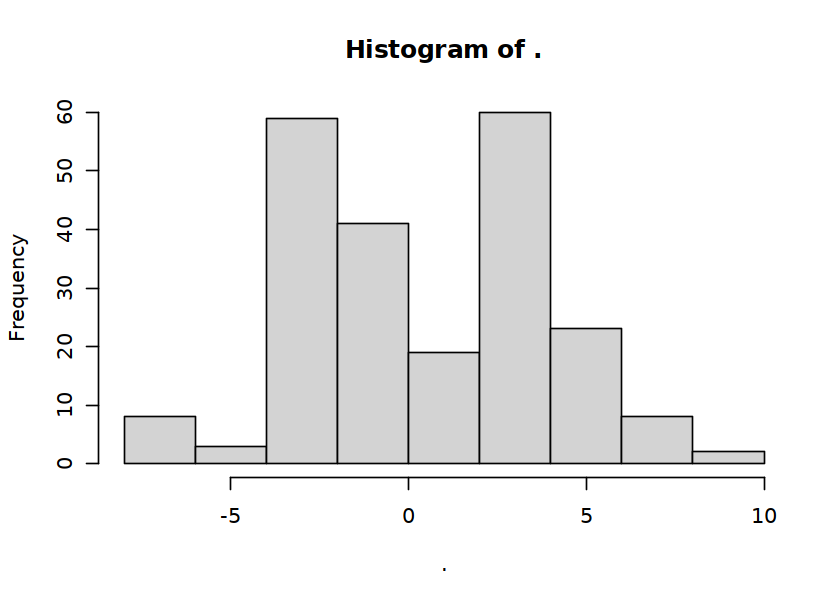

In [67]:
df2$res$score %>% hist

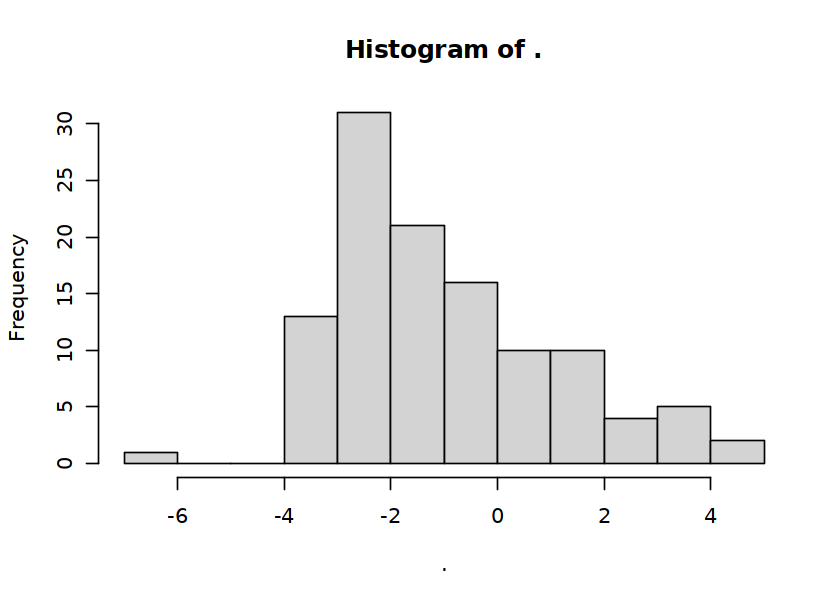

In [68]:
df1$res$score %>% hist